<a href="https://colab.research.google.com/github/AKFahim110/AKFahim110/blob/main/MnistDigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pytorch library**

1.   torch:Pytorch core library
2.   torchvision: The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision. https://pytorch.org/vision/stable/index.html
**Python library**

1.   matplotlib: https://matplotlib.org/stable/users/explain/quick_start.html
2.   numpy:https://numpy.org/doc/stable/user/quickstart.html


In [8]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [17]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
%matplotlib inline


Here we can utilize the torchvision library to utilize the available dataset in the library which is very convinient as a beginer. we already imported torchvision and dataset above as:

*  **import torchvision**

*   **from torchvision.datasets import MNIST**

We can see the sub-folder as data in working root directory after data downloading.





In [2]:
#download and define dataset
dataset = MNIST(root = 'data/', download =True, transform = ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12763998.02it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 343749.75it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3180950.15it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9050132.43it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



We can iterate through our dataset and verify the dowloaded dataset. Since we already verified it in the folder where it shows each data has an image associated with it's label. Here, we evaluated the first image. We can check the size of our datasets.


Image shape:  torch.Size([1, 28, 28])
Label:  1
Total data 60000


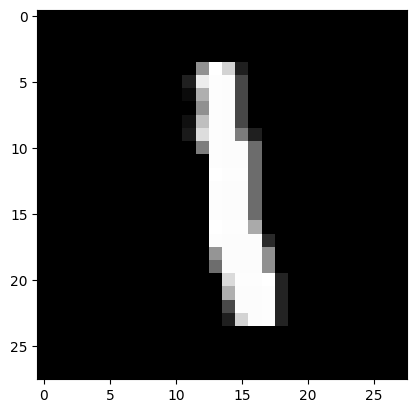

In [3]:
image, label = dataset[6]
print('Image shape: ', image.shape)
plt.imshow(image.permute(1,2,0),cmap = 'gray')
print('Label: ', label)
total_data = len(dataset)
print('Total data', total_data)


Image 1 shape:  torch.Size([1, 28, 28])


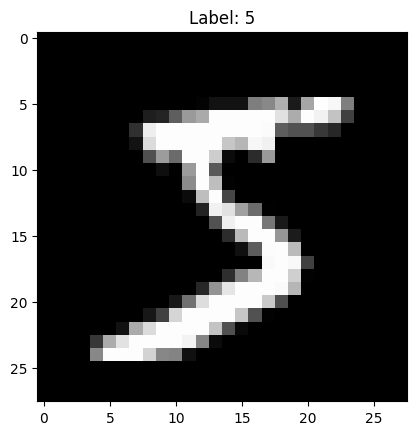

Image 2 shape:  torch.Size([1, 28, 28])


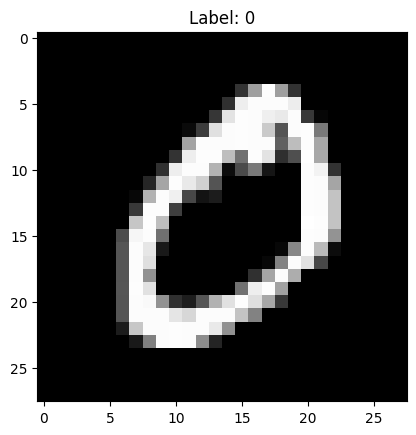

Image 3 shape:  torch.Size([1, 28, 28])


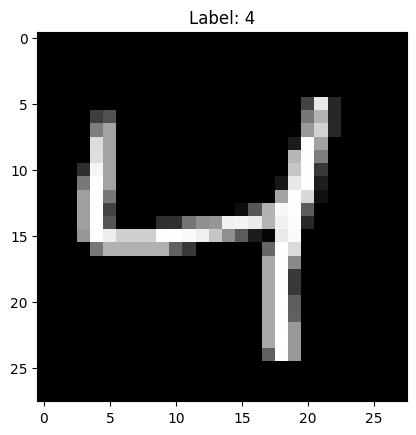

Image 4 shape:  torch.Size([1, 28, 28])


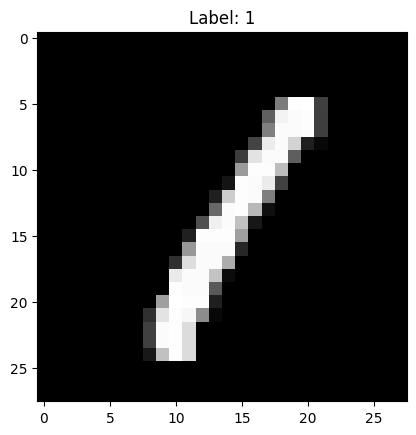

Image 5 shape:  torch.Size([1, 28, 28])


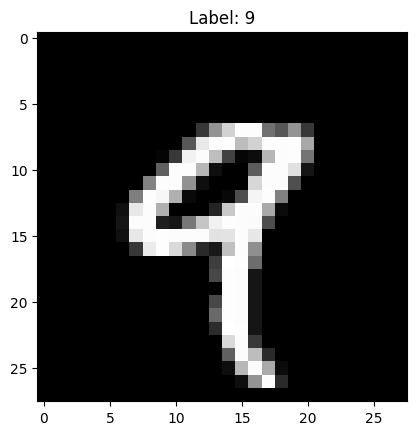

Total data: 60000


In [5]:
#Here I am trying to iterate through other images for  understanding
for i in range(5):
    image, label = dataset[i]
    print(f'Image {i+1} shape: ', image.shape)
    plt.imshow(image.permute(1, 2, 0), cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()
total_data = len(dataset)
print('Total data:', total_data)

In the process of training a deep learning model we need to separate our dataset in 3 vital part as:

1.   **Training set**
2.   **Validation set**
3. **Test set**

Here, we can choose different ratio like(70%-30%) and (80%-20%) based on our task requirements and previous research works.



In [6]:
val_size = 15000
train_size = len(dataset)-val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 15000)

**What is batch size and why do we need it in the deep learning model training process?**

In [7]:
batch_size = 128

Now we need to define a data loading mechanism for both training dataset and validating dataset for smooth training progress. Here, we utilized the pytorch data loading function as:

*   from torch.utils.data.dataloader import DataLoader
*  Check the function details here: https://pytorch.org/docs/stable/data.html

**So we can check lenth of training and validating cycle:

1.   Round((45000/128), 0)= 352
2.   Round((15000/128*2), 0)=59



In [8]:
train_loader = DataLoader(train_ds, batch_size, shuffle= True, num_workers = 2, pin_memory = True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers = 2, pin_memory = True)
print(len(train_loader))
print(len(val_loader))

352
59


To understand our task broadly we can plot a batch of our training data below:

Image shape:  torch.Size([128, 1, 28, 28])


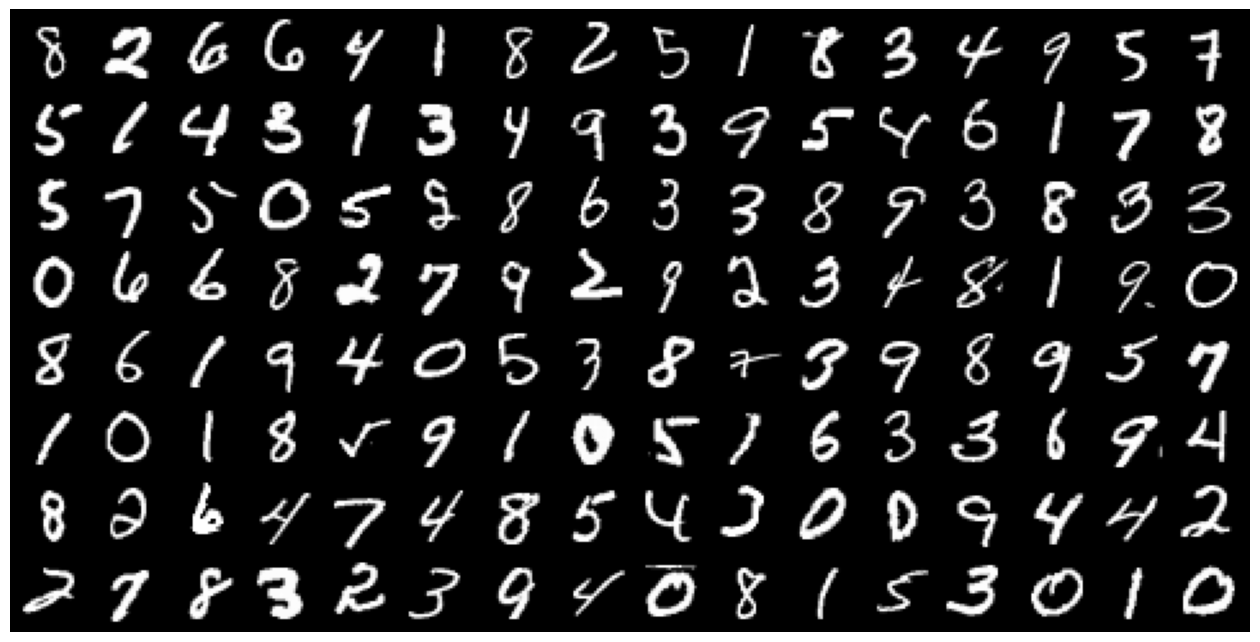

In [9]:
for images, labels in train_loader:
  print("Image shape: ", images.shape)
  plt.figure(figsize = (16,9))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
  break

Now we have prepared our data and need to design our neural network model where we will utilized linerar layer for the input processing as **nn.Linear**: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear.

Mainly in a neural network model we have following steps:



1.   Training: need to calculate the loss(https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
2.   Validating: need to calculate the loss
3. Updating



Here, we defined the model and processing forward pass for linear processing.

In the model training we also defined the training step and validation step and implement total 5 layers.
Added ReLU activations after the new hidden layers, just like the first two hidden layers.


In [10]:
class MnistModel(nn.Module):
    def __init__(self, in_size, layer1_size, layer2_size, layer3_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(in_size, layer1_size)
        self.bn1 = nn.BatchNorm1d(layer1_size)
        self.linear2 = nn.Linear(layer1_size, layer2_size)
        self.bn2 = nn.BatchNorm1d(layer2_size)
        self.linear3 = nn.Linear(layer2_size, layer3_size)
        self.bn3 = nn.BatchNorm1d(layer3_size)
        self.linear4 = nn.Linear(layer3_size, output_size)

    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        out = F.relu(self.bn1(self.linear1(xb)))
        out = F.relu(self.bn2(self.linear2(out)))
        out = F.relu(self.bn3(self.linear3(out)))
        out = self.linear4(out)
        return out


    def training_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)  # Generate predictions
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)  # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Now we need to define an accuracy function to measure our model performance as follows:

In [11]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

Initilize the parameter for our 5 layers model:

In [12]:
input_size = 784
l1_size = 128
l2_size = 64
l3_size = 32
l4_size = 16
output_classes = 10


Initializing our model and verify the expected model parameter according to model defination:

In [13]:
model = MnistModel(input_size, l1_size, l2_size, l3_size, output_classes)
for t in model.parameters():
    print(t.shape)


torch.Size([128, 784])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([64, 128])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([32, 64])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Now let's run our model with a batch of input to verify if it works according to defination. Here we can verify following parameters:

1.   Expected output shape which is (256 imaages with 10 different probability of label)
2.   Each output will have 10 label possibility for [0-9]



In [18]:
# Assuming you have already defined your device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model to the specified device
model.to(device)

# Iterate through the training data loader
for images, labels in train_loader:
    # Move images and labels to the same device as the model
    images, labels = images.to(device), labels.to(device)

    # Forward pass through the model
    output = model(images)  # The images are expected to be flattened inside the model

    # Calculate loss
    loss = F.cross_entropy(output, labels)

    # Print loss and output details
    print('Loss: ', loss.item())
    print('Output shape: ', output.shape)  # Should be [batch_size, output_classes]
    print('Sample output: ', output[0])    # Prints the prediction scores for the first sample

    # Stop after first batch for this test
    break


Loss:  2.3601019382476807
Output shape:  torch.Size([128, 10])
Sample output:  tensor([ 0.2719,  0.8510,  0.0601, -0.5639, -0.6133, -0.3800,  0.0780,  0.0434,
         0.1696,  0.3899], grad_fn=<SelectBackward0>)


Using GPU

In [19]:
torch.cuda.is_available()

False

In [20]:
def get_default_device():
  """pick GPU if available else pick cpu"""
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    torch.device('cpu')

In [21]:
device = get_default_device()
device

Let's move the data and model to the chossen device

In [22]:
def to_device(data, device):
  """Move tensor to choosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking = True)

In [23]:
for images, labels in train_loader:
  print('iamges shape: ', images.shape)
  images = to_device(images, device)
  print(images.device)
  break

iamges shape:  torch.Size([128, 1, 28, 28])
cpu


Finally, we define a DeviceDataLoader class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an __iter__ method to retrieve batches of data and an __len__ method to get the number of batches.

In [24]:
class DeviceDataLoader():
  """wrap datalaoder to move data to a device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """yeild a batch of data after moving to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)



wrapping dataLoader using device dataloader

In [25]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
print(len(val_loader))

59


In [26]:
# for xb, yb in val_loader:
#   plt.imshow(xb[0].cpu().permute(1,2,0))
#   print('Device: ', xb.device)
#   print('yb.value: ', yb)
#   print(len(yb))
#   break


We'll define two functions: fit and evaluate to train the model using gradient descent and evaluate its performance on the validation set.

In [27]:
def evaluate(model, val_loader):
  """Evaluate the model performance on the validation set"""
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


***Optimize with Adam Optimizer which often works better out of the box.***

In [28]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)  # Use Adam optimizer
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history


**add a learning rate scheduler to adjust the learning rate during training:**

In [29]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)  # Reduce LR every 5 epochs

    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation Phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

        # Step the scheduler
        scheduler.step()

    return history


In [30]:
model = MnistModel(in_size=input_size,
                   layer1_size=l1_size,
                   layer2_size=l2_size,
                   layer3_size=l3_size,
                   output_size=output_classes)

# Send the model to the GPU (if device is set to GPU)
to_device(model, device)



MnistModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear3): Linear(in_features=64, out_features=32, bias=True)
  (bn3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear4): Linear(in_features=32, out_features=10, bias=True)
)

In [31]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.323512554168701, 'val_acc': 0.1078905537724495}]

In [32]:
# #with 1 hidden Layer
history += fit(10, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 0.1555, val_acc: 0.9624
Epoch [1], val_loss: 0.1065, val_acc: 0.9698
Epoch [2], val_loss: 0.0949, val_acc: 0.9719
Epoch [3], val_loss: 0.0837, val_acc: 0.9742
Epoch [4], val_loss: 0.0834, val_acc: 0.9742
Epoch [5], val_loss: 0.0695, val_acc: 0.9795
Epoch [6], val_loss: 0.0690, val_acc: 0.9791
Epoch [7], val_loss: 0.0746, val_acc: 0.9778
Epoch [8], val_loss: 0.0745, val_acc: 0.9782
Epoch [9], val_loss: 0.0772, val_acc: 0.9781


In [33]:
# with 4 hidden layers
history += fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.0969, val_acc: 0.9727
Epoch [1], val_loss: 0.0880, val_acc: 0.9752
Epoch [2], val_loss: 0.0881, val_acc: 0.9759
Epoch [3], val_loss: 0.1000, val_acc: 0.9733
Epoch [4], val_loss: 0.0933, val_acc: 0.9745
Epoch [5], val_loss: 0.0768, val_acc: 0.9797
Epoch [6], val_loss: 0.0744, val_acc: 0.9796
Epoch [7], val_loss: 0.0754, val_acc: 0.9795
Epoch [8], val_loss: 0.0799, val_acc: 0.9787
Epoch [9], val_loss: 0.0832, val_acc: 0.9783


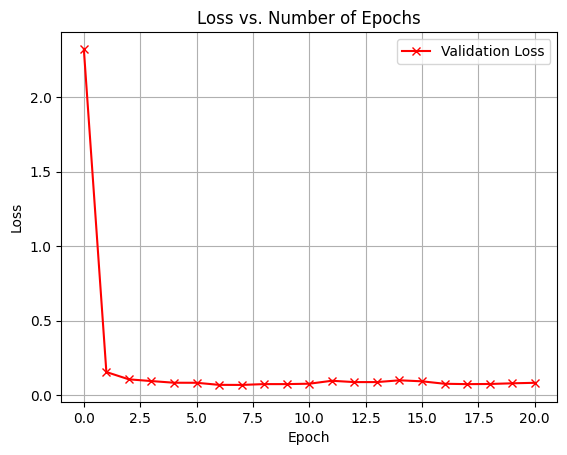

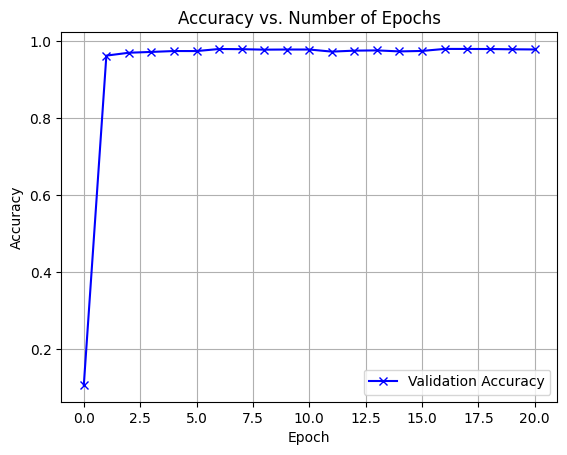

In [34]:
# Plot Loss vs. Number of Epochs
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x', label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Number of Epochs')
plt.grid(True)  # Add gridlines for better readability
plt.legend()

# Optional: Plot Accuracy vs. Number of Epochs
accuracies = [x['val_acc'] for x in history]
plt.figure()
plt.plot(accuracies, '-x', label='Validation Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Epochs')
plt.grid(True)
plt.legend()

plt.show()


Defining the test dataset

In [35]:
test_dataset = MNIST(root = 'data/', train=False, transform = ToTensor())

In [36]:
def predict_image(image, model):
  xb = to_device(image.unsqueeze(0), device)
  yb = model(xb)
  _,pred  = torch.max(yb, dim= 1)
  return pred[0].item()

Label: 9
Predicted: 9


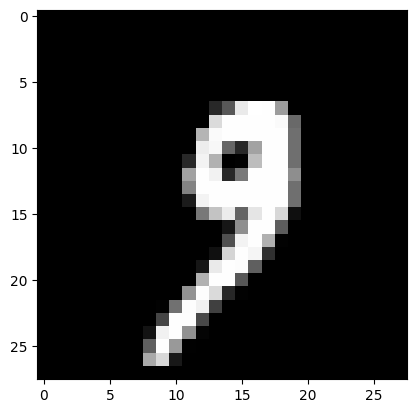

In [39]:
# Switch the model to evaluation mode
model.eval()

img, label = test_dataset[1000]
plt.imshow(img[0], cmap='gray')
print('Label:', label)

# Add a batch dimension by unsqueezing the image (shape becomes [1, 1, 28, 28] instead of [1, 28, 28])
predicted = predict_image(img.unsqueeze(0), model)
print('Predicted:', predicted)


Label: 9
Predicted: 9


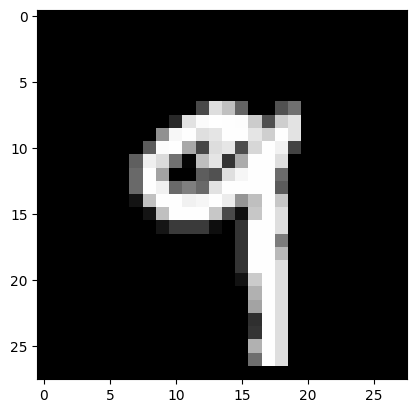

In [38]:
# Switch the model to evaluation mode
model.eval()

img, label = test_dataset[322]
plt.imshow(img[0], cmap='gray')
print('Label:', label)

# Add a batch dimension by unsqueezing the image (shape becomes [1, 1, 28, 28] instead of [1, 28, 28])
predicted = predict_image(img.unsqueeze(0), model)
print('Predicted:', predicted)


Label: 2
Predicted: 2


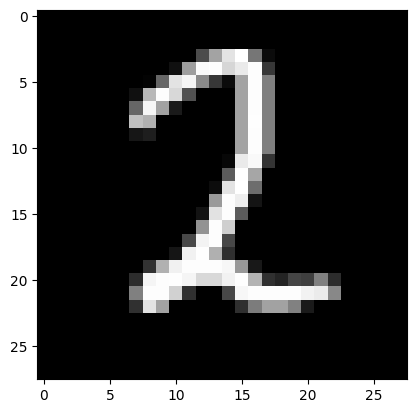

In [40]:
# Switch the model to evaluation mode
model.eval()

img, label = test_dataset[452]
plt.imshow(img[0], cmap='gray')
print('Label:', label)

# Add a batch dimension by unsqueezing the image (shape becomes [1, 1, 28, 28] instead of [1, 28, 28])
predicted = predict_image(img.unsqueeze(0), model)
print('Predicted:', predicted)


Evaluate overall loss and accuracy of the model

Label: 6
Predicted: 6


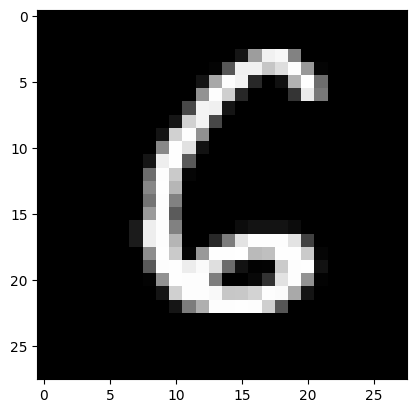

In [41]:
# Switch the model to evaluation mode
model.eval()

img, label = test_dataset[98]
plt.imshow(img[0], cmap='gray')
print('Label:', label)

# Add a batch dimension by unsqueezing the image (shape becomes [1, 1, 28, 28] instead of [1, 28, 28])
predicted = predict_image(img.unsqueeze(0), model)
print('Predicted:', predicted)


In [42]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size= 256), device)

In [43]:
#with 1 hidden layer
result=evaluate(model, test_loader)
result

{'val_loss': 0.07443872839212418, 'val_acc': 0.98095703125}

In [44]:
# with 4 hidden layers
result = evaluate(model, test_loader)
result


{'val_loss': 0.07443872839212418, 'val_acc': 0.98095703125}